### 환경 설정

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 데이터 준비

In [61]:
import pandas as pd
data = pd.read_csv(
                   "../../데이터/재무제표_분석용데이터.csv",
                   encoding = "euc-kr",
                   usecols = ['기업', '연도', '현재_주가', '미래_주가', 'ROA', 'ROE', 'PER'],
                   )
data.dropna(inplace = True)

#### 산업군 추가

In [62]:
stock_info_data = pd.read_csv(
    "../../데이터/종목정보.txt", sep="\t", encoding="euc-kr", usecols=["Name", "Sector"]
)

data = pd.merge(data, stock_info_data, left_on="기업", right_on="Name", how="left")
data.drop(["Name"], axis=1, inplace=True)

In [63]:
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100

### 수익률과 투자 지표 간 상관관계 확인

#### PER

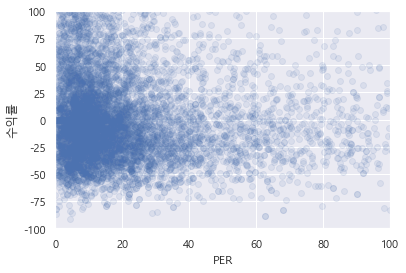

-0.10330189130477477


In [64]:
plt.scatter(data["PER"], data["수익률"], alpha = 0.1)
plt.xlabel("PER")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["PER", "수익률"])

#### ROA

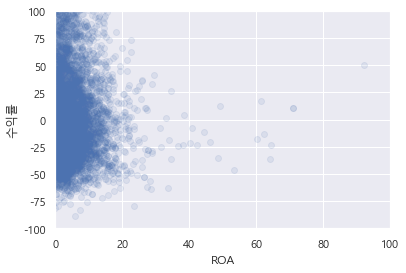

0.020013102220156488


In [65]:
plt.scatter(data["ROA"], data["수익률"], alpha = 0.1)
plt.xlabel("ROA")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROA", "수익률"])

#### ROE

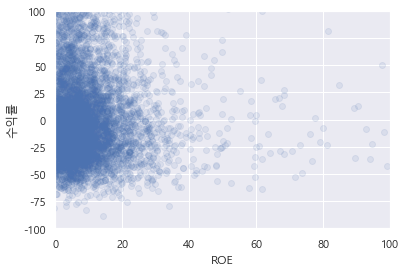

0.013279292707818332


In [66]:
plt.scatter(data["ROE"], data["수익률"], alpha = 0.1)
plt.xlabel("ROE")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)
plt.show()
print(data.corr("spearman").loc["ROE", "수익률"])

### 산업군을 고려한 수익률과 투자 지표 간 상관관계 확인

In [67]:
display(data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts())

특수 목적용 기계 제조업          101
전자부품 제조업                98
소프트웨어 개발 및 공급업          93
의약품 제조업                 79
자동차 신품 부품 제조업           72
                      ... 
신발 및 신발 부분품 제조업          1
악기 제조업                   1
금속 주조업                   1
건축자재, 철물 및 난방장치 도매업      1
무기 및 총포탄 제조업             1
Name: Sector, Length: 146, dtype: int64

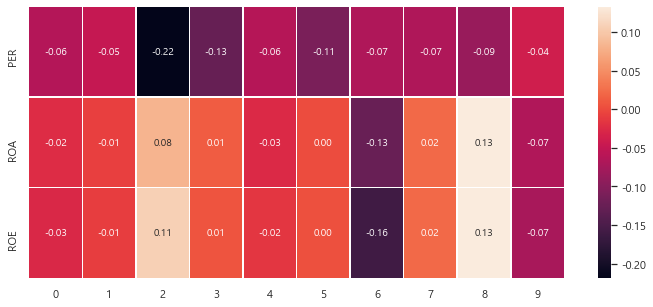

In [68]:
result = []
top10_S = data.drop_duplicates(['기업', 'Sector'])['Sector'].value_counts().index[:10]
for col in ["PER", "ROA", "ROE"]:
    record = []
    for sector in top10_S:
        temp = data.loc[data['Sector'] == sector, [col, '수익률']].dropna()
        corr = temp.corr("spearman").iloc[0, 1]
        record.append(corr)
    result.append(record)

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot=True, fmt=".2f", linewidths=0.5)
plt.yticks([0.5, 1.5, 2.5], ["PER", "ROA", "ROE"])
plt.show()

### 동일 가중 교체 매매에 따른 수익 비교

#### 전체 산업군

<AxesSubplot:>

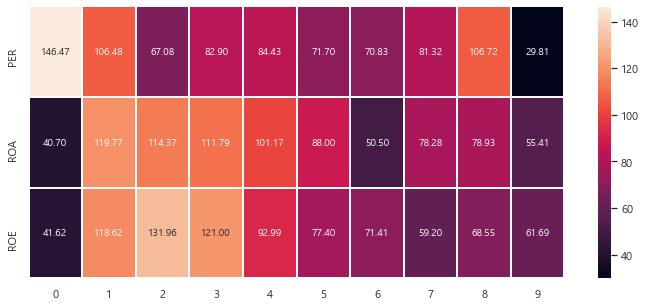

In [72]:
import numpy as np
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 10) # 투자금 초기화
    for year in range(2014, 2020):
        y_data = data.loc[data['연도'] == year]
        group_list = pd.qcut(y_data[col], 10, labels = range(10)).astype(int)
        for group in range(10):
            ror_list = y_data.loc[group_list == group, '수익률']
            inve_per_stock = inve_list[group] / len(ror_list)
            profit = (inve_per_stock * ror_list / 100).sum()
            inve_list[group] += profit
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(10), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")

#### 소프트웨어 개발 및 공급업

<AxesSubplot:>

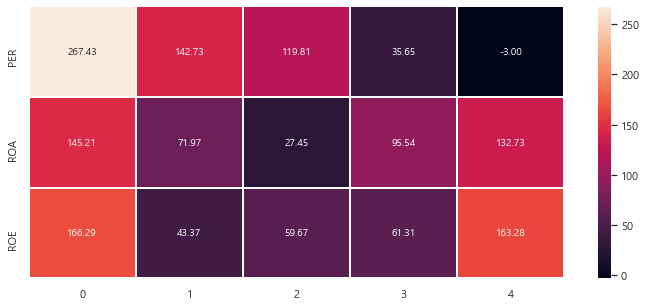

In [80]:
s_data = data.loc[data['Sector'] == "소프트웨어 개발 및 공급업"] # 필터링
result = []
for col in ["PER", "ROA", "ROE"]:
    inve_list = np.array([10**8] * 5)
    for year in range(2014, 2020):
        y_data = s_data.loc[data['연도'] == year]
        group_list = pd.qcut(y_data[col], 5, labels = range(5)).astype(int)
        for group in range(5):
            ror_list = y_data.loc[group_list == group, '수익률']
            inve_per_stock = inve_list[group] / len(ror_list)
            profit = (inve_per_stock * ror_list / 100).sum()
            inve_list[group] += profit
    profit_ratio_list = (inve_list - 10 ** 8) / 10 ** 8 * 100
    result.append(profit_ratio_list)
result = pd.DataFrame(result, columns = range(5), index = ["PER", "ROA", "ROE"])

plt.figure(figsize = (12, 5))
sns.heatmap(result, annot = True, linewidth = 1, fmt = ".2f")